# BREAST_CANCER_CLASSIFICATION

This notebook mainly talks about the data classification of the breast cancer data 

# 1 - IMPORTS FOR NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - LOAD BREAST CANCER DATA 

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

# 3 - CONVERT TO PANDAS DATAFRAME

### 3.2 - DATA OVERVIEW
<p>Attribute Information:</p>
<ol>
    <li><b>RADIUS</b>      &emsp;(mean of distances from center to points on the perimeter)</li>
    <li><b>TEXTURE</b>        &emsp;(standard deviation of gray-scale values)</li>
    <li><b>PERIMETER</b>     &emsp;proportion of non-retail business acres per town</li>
    <li><b>AREA</b>      &emsp;Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
    <li><b>SMOOTHNESS</b>       &emsp;(local variation in radius lengths)</li>
    <li><b>COMPACTNESS</b>        &emsp;(perimeter^2 / area - 1.0)</li>
    <li><b>CONCAVITY</b>       &emsp;(severity of concave portions of the contour)</li>
    <li><b>CONCAVE POINTS</b>       &emsp;(number of concave portions of the contour)</li>
    <li><b>SYMMETRY</b>       &emsp;index of accessibility to radial highways</li>
    <li><b>FRACTAL DIMENSION</b>       &emsp;(“coastline approximation” - 1)</li>
</ol>

# READING THE DATA 

In [6]:
patient_data = pd.read_csv('wdbc.data', names=['PID','CLASS','RADI-M','TEXT-M','PERI-M','AREA-M','SMOO-M','COMP-M','CONC-M','CONP-M','SYMM-M','FDIM-M','RADI-SE','TEXT-SE','PERI-SE','AREA-SE','SMOO-SE','COMP-SE','CONC-SE','CONP-SE','SYMM-SE','FDIM-SE','RADI-MX','TEXT-MX','PERI-MX','AREA-MX','SMOO-MX','COMP-MX','CONC-MX','CONP-MX','SYMM-MX','FDIM-MX'])

In [7]:
patient_data

,PID,CLASS,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,...,RADI-MX,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# PATIENT ID IS NOT NEEDED

In [8]:
del patient_data['PID']

In [9]:
patient_data

,CLASS,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,SYMM-M,...,RADI-MX,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# LABEL ENCODING

In [11]:
patient_data["CLASS"] = patient_data["CLASS"].astype('category')
patient_data["CLASS_CAT"] = patient_data["CLASS"].cat.codes

In [12]:
patient_data

,CLASS,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,SYMM-M,...,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX,CLASS_CAT
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [23]:
del patient_data['CLASS']

In [24]:
patient_data

,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,SYMM-M,FDIM-M,...,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX,CLASS_CAT
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [25]:
patient_data.columns

Index(['RADI-M', 'TEXT-M', 'PERI-M', 'AREA-M', 'SMOO-M', 'COMP-M', 'CONC-M',
       'CONP-M', 'SYMM-M', 'FDIM-M', 'RADI-SE', 'TEXT-SE', 'PERI-SE',
       'AREA-SE', 'SMOO-SE', 'COMP-SE', 'CONC-SE', 'CONP-SE', 'SYMM-SE',
       'FDIM-SE', 'RADI-MX', 'TEXT-MX', 'PERI-MX', 'AREA-MX', 'SMOO-MX',
       'COMP-MX', 'CONC-MX', 'CONP-MX', 'SYMM-MX', 'FDIM-MX', 'CLASS_CAT'],
      dtype='object')

In [26]:
cancer_target = patient_data.iloc[:,30:31]

In [27]:
cancer_target

,CLASS_CAT
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [28]:
del patient_data['CLASS_CAT']

In [29]:
patient_data

,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,SYMM-M,FDIM-M,...,RADI-MX,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
patient_data.describe()

,RADI-M,TEXT-M,PERI-M,AREA-M,SMOO-M,COMP-M,CONC-M,CONP-M,SYMM-M,FDIM-M,...,RADI-MX,TEXT-MX,PERI-MX,AREA-MX,SMOO-MX,COMP-MX,CONC-MX,CONP-MX,SYMM-MX,FDIM-MX
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# CHECK FOR NA WITH COUNT

Above it shows that all of them are 569 values so we do not have any nan values 

# TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(patient_data, cancer_target, test_size=0.33, random_state=42)

In [32]:
train_x.shape

(381, 30)

# START CLASSIFICATION

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_pred = clf.predict(test_x)

# CLASSIFICATION METRICS 

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred)

0.9574468085106383

# RESULT VISUALIZATION

In [45]:
test_y

,CLASS_CAT
204,0
70,1
131,1
431,0
540,0
...,...
141,1
498,1
7,1
541,0


In [47]:
test_y.reset_index(inplace = True)
test_y

,index,CLASS_CAT
0,204,0
1,70,1
2,131,1
3,431,0
4,540,0
...,...,...
183,141,1
184,498,1
185,7,1
186,541,0


In [48]:
del test_y['index']

In [49]:
test_y

,CLASS_CAT
0,0
1,1
2,1
3,0
4,0
...,...
183,1
184,1
185,1
186,0


In [51]:
test_y['y_pred'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
test_y

,CLASS_CAT,y_pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
183,1,1
184,1,1
185,1,1
186,0,1


In [54]:
test_y['index_1'] = test_y.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
test_y

,CLASS_CAT,y_pred,index_1
0,0,0,0
1,1,1,1
2,1,1,2
3,0,0,3
4,0,0,4
...,...,...,...
183,1,1,183
184,1,1,184
185,1,1,185
186,0,1,186


In [46]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int8)

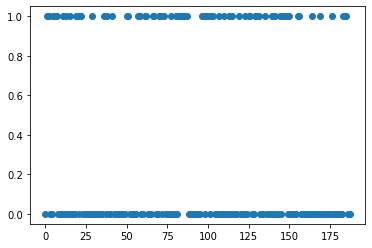

In [56]:
plt.scatter(test_y['index_1'],test_y['CLASS_CAT'])